# Hot Dog Not Hot Dog

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import time

import tensorflow as tf
import tensorflow.keras as keras

import python_code.data as data
import python_code.models as models
import python_code.utils as utils

## Load Data

In [1]:
directory = './Data/model_data'
image_width = 256
image_height = 256
channels = 3
batch_size = 32

In [ ]:
train_ds, validation_ds, test_ds = data.load_data(directory, 
                                                  batch_size, 
                                                  image_height,
                                                  image_width)

Found 498 files belonging to 2 classes.
Using 399 files for training.
Found 498 files belonging to 2 classes.
Using 99 files for validation.
Found 500 files belonging to 2 classes.


2023-03-17 10:13:25.292754: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
class_names = train_ds.class_names

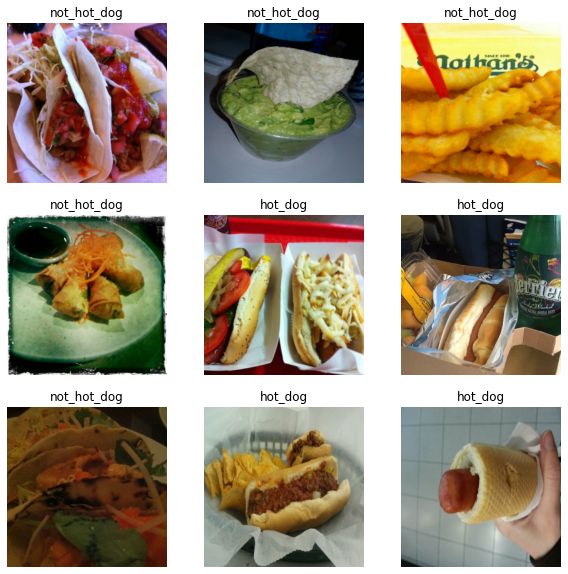

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

## VGG16

### Preparing Model

In [7]:
# Creating a new model
model = models.create_VGG16(image_height, image_width, channels)

In [8]:
# Compile Model 
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0003),
              metrics=['accuracy',
                       tf.keras.metrics.AUC(), 
                       tf.keras.metrics.Recall(),
                      ]
            )
 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Train Data

In [9]:
# Set Up Tensorboard
run_logdir = utils.get_run_logdir('VGG16')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [10]:
model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=25,
  callbacks=[early_exit_cb, tensorboard_cb]
)

Epoch 1/25
124/206 [=================>............] - ETA: 6:51 - loss: 9.5421 - accuracy: 0.6935 - auc: 0.7052 - recall: 0.7324

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1288s 6s/step - loss: 7.4123 - accuracy: 0.7135 - auc: 0.7268 - recall: 0.7524 - val_loss: 1.7193 - val_accuracy: 0.8123 - val_auc: 0.8435 - val_recall: 0.8564
Epoch 2/25
124/206 [=================>............] - ETA: 6:42 - loss: 1.9353 - accuracy: 0.7686 - auc: 0.8173 - recall: 0.7984

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1265s 6s/step - loss: 1.6632 - accuracy: 0.7674 - auc: 0.8191 - recall: 0.8020 - val_loss: 0.7289 - val_accuracy: 0.7989 - val_auc: 0.8630 - val_recall: 0.8270
Epoch 3/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.7869 - accuracy: 0.7762 - auc: 0.8477 - recall: 0.8100

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1262s 6s/step - loss: 0.7319 - accuracy: 0.7765 - auc: 0.8465 - recall: 0.8125 - val_loss: 0.5115 - val_accuracy: 0.8032 - val_auc: 0.8709 - val_recall: 0.8417
Epoch 4/25
124/206 [=================>............] - ETA: 6:42 - loss: 0.5254 - accuracy: 0.8027 - auc: 0.8696 - recall: 0.8349

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1263s 6s/step - loss: 0.5101 - accuracy: 0.8006 - auc: 0.8700 - recall: 0.8379 - val_loss: 0.4703 - val_accuracy: 0.7953 - val_auc: 0.8754 - val_recall: 0.8627
Epoch 5/25
124/206 [=================>............] - ETA: 6:38 - loss: 0.4343 - accuracy: 0.8145 - auc: 0.8950 - recall: 0.8434

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1258s 6s/step - loss: 0.4391 - accuracy: 0.8152 - auc: 0.8930 - recall: 0.8505 - val_loss: 0.4278 - val_accuracy: 0.8183 - val_auc: 0.8908 - val_recall: 0.8564
Epoch 6/25
124/206 [=================>............] - ETA: 6:44 - loss: 0.3962 - accuracy: 0.8319 - auc: 0.9094 - recall: 0.8580

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1265s 6s/step - loss: 0.3858 - accuracy: 0.8357 - auc: 0.9115 - recall: 0.8650 - val_loss: 0.4162 - val_accuracy: 0.8335 - val_auc: 0.8975 - val_recall: 0.8774
Epoch 7/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.3463 - accuracy: 0.8526 - auc: 0.9281 - recall: 0.8739

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1263s 6s/step - loss: 0.3535 - accuracy: 0.8507 - auc: 0.9250 - recall: 0.8774 - val_loss: 0.4117 - val_accuracy: 0.8299 - val_auc: 0.9004 - val_recall: 0.8470
Epoch 8/25
124/206 [=================>............] - ETA: 6:43 - loss: 0.3066 - accuracy: 0.8710 - auc: 0.9415 - recall: 0.8885

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1265s 6s/step - loss: 0.3158 - accuracy: 0.8644 - auc: 0.9375 - recall: 0.8864 - val_loss: 0.4115 - val_accuracy: 0.8354 - val_auc: 0.9038 - val_recall: 0.8690
Epoch 9/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.3120 - accuracy: 0.8667 - auc: 0.9401 - recall: 0.8798

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1259s 6s/step - loss: 0.3122 - accuracy: 0.8676 - auc: 0.9401 - recall: 0.8866 - val_loss: 0.4242 - val_accuracy: 0.8256 - val_auc: 0.8994 - val_recall: 0.8574
Epoch 10/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.2846 - accuracy: 0.8808 - auc: 0.9498 - recall: 0.8990

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1261s 6s/step - loss: 0.2892 - accuracy: 0.8750 - auc: 0.9474 - recall: 0.9003 - val_loss: 0.4076 - val_accuracy: 0.8366 - val_auc: 0.9074 - val_recall: 0.8889
Epoch 11/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.2804 - accuracy: 0.8833 - auc: 0.9516 - recall: 0.9019

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1259s 6s/step - loss: 0.2765 - accuracy: 0.8831 - auc: 0.9526 - recall: 0.9051 - val_loss: 0.4032 - val_accuracy: 0.8360 - val_auc: 0.9094 - val_recall: 0.8606
Epoch 12/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.2570 - accuracy: 0.8979 - auc: 0.9600 - recall: 0.9097

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1260s 6s/step - loss: 0.2630 - accuracy: 0.8898 - auc: 0.9574 - recall: 0.9072 - val_loss: 0.4037 - val_accuracy: 0.8317 - val_auc: 0.9060 - val_recall: 0.8512
Epoch 13/25
124/206 [=================>............] - ETA: 6:41 - loss: 0.2312 - accuracy: 0.9020 - auc: 0.9670 - recall: 0.9195

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1263s 6s/step - loss: 0.2361 - accuracy: 0.8999 - auc: 0.9652 - recall: 0.9201 - val_loss: 0.4079 - val_accuracy: 0.8360 - val_auc: 0.9102 - val_recall: 0.8501


### Evaluate Model

In [11]:
model.evaluate(test_ds)

55/55 [==============================] - 263s 5s/step - loss: 0.4094 - accuracy: 0.8301 - auc: 0.9095 - recall: 0.8375


[0.4093990921974182,
 0.8300577998161316,
 0.9094676375389099,
 0.8375411629676819]

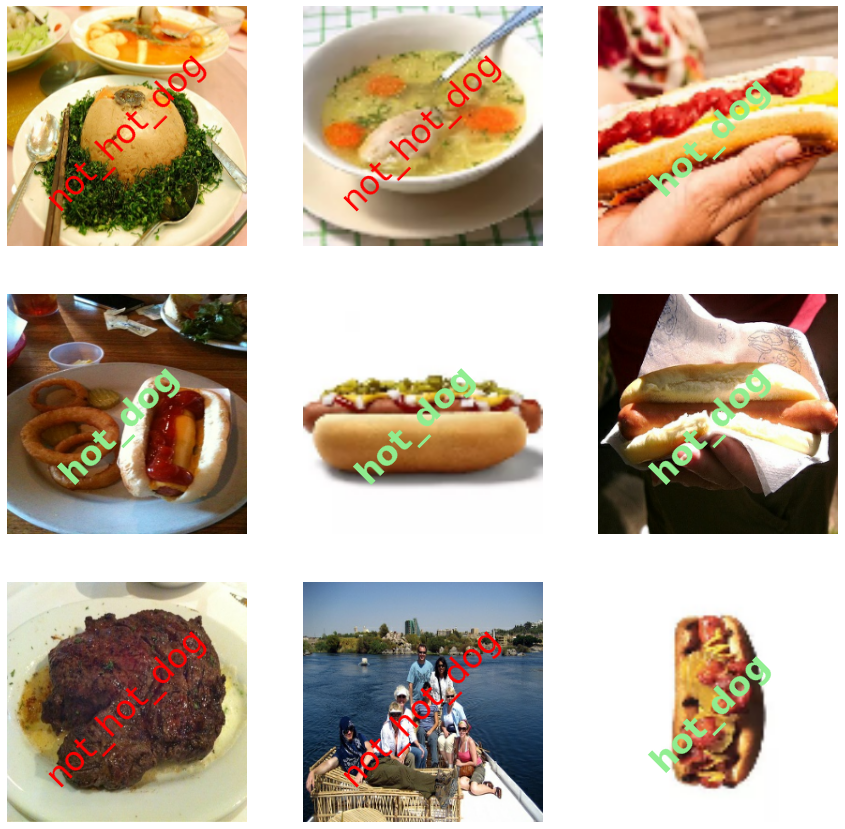

In [12]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")

## AlexNet

### Build and Compile Model

In [13]:
model_alexnet = models.create_AlexNet(image_height, image_width, channels)
model_alexnet.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 256)      1024

In [14]:
model_alexnet.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=.0003),
                      metrics=['accuracy',
                               tf.keras.metrics.AUC(), 
                               tf.keras.metrics.Recall(),
                              ]
                    )

### Training Model

In [16]:
run_logdir = utils.get_run_logdir('alexnet')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [17]:
model_alexnet.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=25,
  callbacks=[early_exit_cb, tensorboard_cb]
)

Epoch 1/25
124/206 [=================>............] - ETA: 2:01 - loss: 1.6859 - accuracy: 0.5496 - auc_1: 0.5565 - recall_1: 0.6190

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 336s 2s/step - loss: 1.3130 - accuracy: 0.5742 - auc_1: 0.5786 - recall_1: 0.6494 - val_loss: 0.6452 - val_accuracy: 0.6337 - val_auc_1: 0.7124 - val_recall_1: 0.8994
Epoch 2/25
124/206 [=================>............] - ETA: 1:57 - loss: 0.6471 - accuracy: 0.6542 - auc_1: 0.7009 - recall_1: 0.7223

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 325s 2s/step - loss: 0.6301 - accuracy: 0.6675 - auc_1: 0.7150 - recall_1: 0.7506 - val_loss: 0.8795 - val_accuracy: 0.5796 - val_auc_1: 0.7247 - val_recall_1: 1.0000
Epoch 3/25
124/206 [=================>............] - ETA: 1:59 - loss: 0.6045 - accuracy: 0.6883 - auc_1: 0.7423 - recall_1: 0.7617

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 325s 2s/step - loss: 0.5948 - accuracy: 0.6972 - auc_1: 0.7501 - recall_1: 0.7788 - val_loss: 0.5850 - val_accuracy: 0.6914 - val_auc_1: 0.7636 - val_recall_1: 0.6384
Epoch 4/25
124/206 [=================>............] - ETA: 1:56 - loss: 0.5695 - accuracy: 0.7130 - auc_1: 0.7772 - recall_1: 0.7755

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 321s 2s/step - loss: 0.5551 - accuracy: 0.7241 - auc_1: 0.7867 - recall_1: 0.8017 - val_loss: 0.8505 - val_accuracy: 0.6112 - val_auc_1: 0.7927 - val_recall_1: 0.9927
Epoch 5/25
124/206 [=================>............] - ETA: 1:56 - loss: 0.5329 - accuracy: 0.7281 - auc_1: 0.8028 - recall_1: 0.8016

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 321s 2s/step - loss: 0.5424 - accuracy: 0.7247 - auc_1: 0.7946 - recall_1: 0.8033 - val_loss: 1.0100 - val_accuracy: 0.5820 - val_auc_1: 0.7116 - val_recall_1: 1.0000


### Evaluating Model

In [18]:
model_alexnet.evaluate(test_ds)

55/55 [==============================] - 19s 339ms/step - loss: 0.6588 - accuracy: 0.6295 - auc_1: 0.7039 - recall_1: 0.4973


[0.6588141918182373,
 0.6294797658920288,
 0.703888475894928,
 0.49725577235221863]

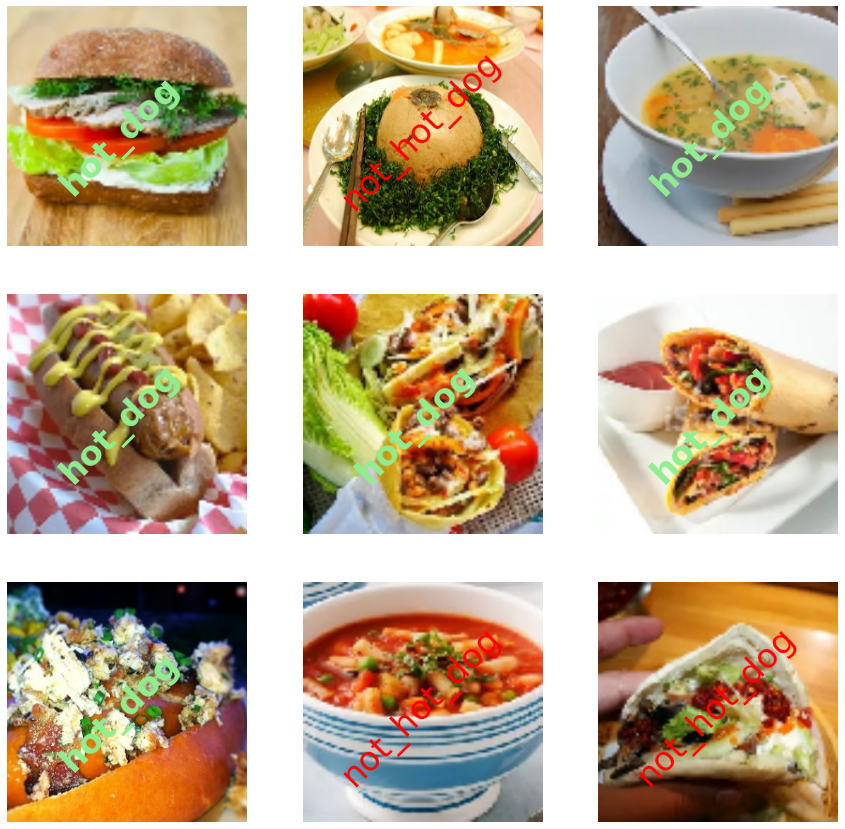

In [35]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model_alexnet.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")

## Pretrained Inception ResNet V2

### Build and Compile Model

In [22]:
resnet_v2 = models.create_ResNetV2(image_height, image_width, channels)
resnet_v2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_208 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_205 (Batch  (None, 127, 127, 32  96         ['conv2d_208[0][0]']             
 Normalization)                 )                                                           

In [23]:
# Compile Model 
resnet_v2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.003),
              metrics=['accuracy',
                       tf.keras.metrics.AUC(), 
                       tf.keras.metrics.Recall(),
                      ]
            )

### Training Model

In [24]:
run_logdir = utils.get_run_logdir('resnet_v2')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [26]:
resnet_v2.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=25,
  callbacks=[
             early_exit_cb, 
             tensorboard_cb
            ]
)

Epoch 1/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6839 - accuracy: 0.5693 - auc_2: 0.4998 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 671s 3s/step - loss: 0.6823 - accuracy: 0.5759 - auc_2: 0.5027 - recall_2: 1.0000 - val_loss: 0.6813 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 2/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6833 - accuracy: 0.5706 - auc_2: 0.4981 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 666s 3s/step - loss: 0.6819 - accuracy: 0.5761 - auc_2: 0.5041 - recall_2: 1.0000 - val_loss: 0.6809 - val_accuracy: 0.5796 - val_auc_2: 0.4988 - val_recall_2: 1.0000
Epoch 3/25
124/206 [=================>............] - ETA: 3:35 - loss: 0.6832 - accuracy: 0.5701 - auc_2: 0.4868 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 672s 3s/step - loss: 0.6815 - accuracy: 0.5758 - auc_2: 0.4950 - recall_2: 0.9960 - val_loss: 0.6808 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 4/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6831 - accuracy: 0.5708 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 670s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4997 - recall_2: 1.0000 - val_loss: 0.6807 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 5/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6838 - accuracy: 0.5685 - auc_2: 0.4897 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 670s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4943 - recall_2: 1.0000 - val_loss: 0.6807 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 6/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6833 - accuracy: 0.5703 - auc_2: 0.4896 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 671s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4954 - recall_2: 1.0000 - val_loss: 0.6807 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 7/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6828 - accuracy: 0.5718 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 668s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.5000 - recall_2: 1.0000 - val_loss: 0.6807 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 8/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6835 - accuracy: 0.5696 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 668s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.5000 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 9/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6840 - accuracy: 0.5683 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 668s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.5000 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 10/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6833 - accuracy: 0.5706 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 668s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4955 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 11/25
124/206 [=================>............] - ETA: 3:31 - loss: 0.6840 - accuracy: 0.5680 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 665s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4950 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 12/25
124/206 [=================>............] - ETA: 3:31 - loss: 0.6839 - accuracy: 0.5683 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 664s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4930 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 13/25
124/206 [=================>............] - ETA: 3:31 - loss: 0.6845 - accuracy: 0.5665 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 667s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4976 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000
Epoch 14/25
124/206 [=================>............] - ETA: 3:32 - loss: 0.6835 - accuracy: 0.5698 - auc_2: 0.5000 - recall_2: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 670s 3s/step - loss: 0.6816 - accuracy: 0.5759 - auc_2: 0.4928 - recall_2: 1.0000 - val_loss: 0.6806 - val_accuracy: 0.5796 - val_auc_2: 0.4993 - val_recall_2: 1.0000


### Evaluating Model

In [27]:
resnet_v2.evaluate(test_ds)

55/55 [==============================] - 133s 2s/step - loss: 0.6969 - accuracy: 0.5272 - auc_2: 0.4999 - recall_2: 1.0000


[0.6968598961830139, 0.5271676182746887, 0.4999390244483948, 1.0]

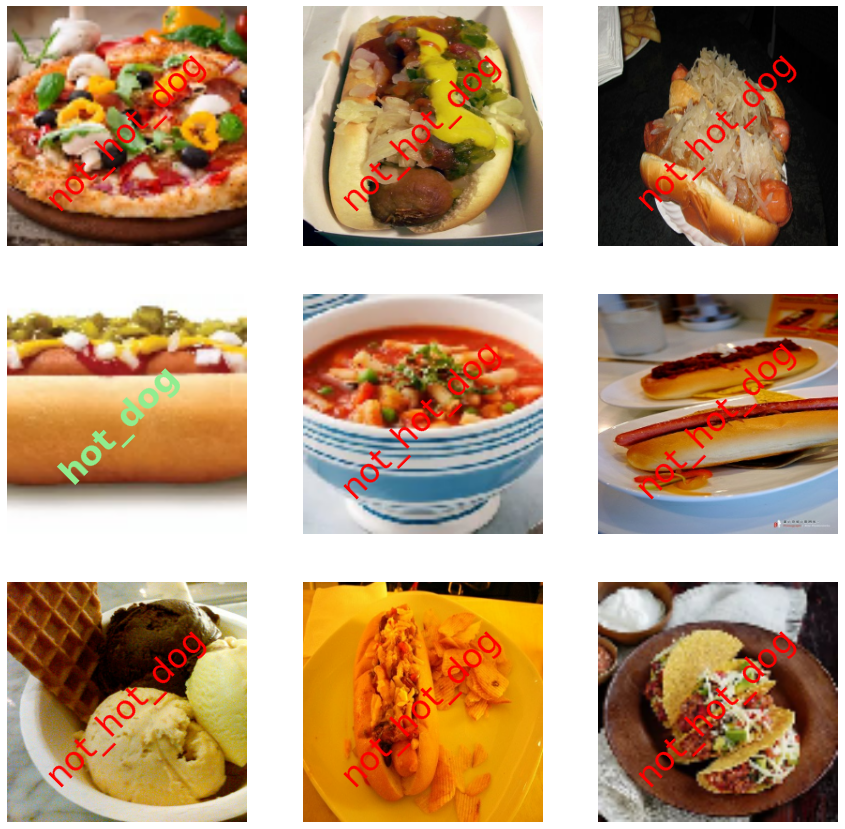

In [34]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = resnet_v2.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")

## Pretrained ResNet50

### Building Model

In [37]:
resnet50 = models.create_ResNet50(image_height, image_width, channels)
resnet50.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [30]:
resnet50.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy',
                       tf.keras.metrics.AUC(), 
                       tf.keras.metrics.Recall(),
                      ]
            )

### Training Model

In [31]:
run_logdir = utils.get_run_logdir('resnet50')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [32]:
resnet50.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=25,
  callbacks=[
             early_exit_cb, 
             tensorboard_cb
            ]
)

Epoch 1/25
124/206 [=================>............] - ETA: 3:17 - loss: 2.3506 - accuracy: 0.7132 - auc_3: 0.7394 - recall_3: 0.7586

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 621s 3s/step - loss: 1.5996 - accuracy: 0.7443 - auc_3: 0.7820 - recall_3: 0.7933 - val_loss: 0.3964 - val_accuracy: 0.8153 - val_auc_3: 0.9236 - val_recall_3: 0.7526
Epoch 2/25
124/206 [=================>............] - ETA: 3:12 - loss: 0.4151 - accuracy: 0.8044 - auc_3: 0.8866 - recall_3: 0.8377

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 607s 3s/step - loss: 0.4054 - accuracy: 0.8157 - auc_3: 0.8931 - recall_3: 0.8547 - val_loss: 0.3201 - val_accuracy: 0.8633 - val_auc_3: 0.9335 - val_recall_3: 0.8983
Epoch 3/25
124/206 [=================>............] - ETA: 3:12 - loss: 0.3632 - accuracy: 0.8362 - auc_3: 0.9151 - recall_3: 0.8735

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 608s 3s/step - loss: 0.3653 - accuracy: 0.8422 - auc_3: 0.9137 - recall_3: 0.8806 - val_loss: 0.3130 - val_accuracy: 0.8578 - val_auc_3: 0.9369 - val_recall_3: 0.9340
Epoch 4/25
124/206 [=================>............] - ETA: 3:11 - loss: 0.3504 - accuracy: 0.8478 - auc_3: 0.9199 - recall_3: 0.8784

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 604s 3s/step - loss: 0.3536 - accuracy: 0.8495 - auc_3: 0.9189 - recall_3: 0.8869 - val_loss: 0.3068 - val_accuracy: 0.8730 - val_auc_3: 0.9415 - val_recall_3: 0.9350
Epoch 5/25
124/206 [=================>............] - ETA: 3:12 - loss: 0.3410 - accuracy: 0.8495 - auc_3: 0.9257 - recall_3: 0.8871

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 606s 3s/step - loss: 0.3370 - accuracy: 0.8533 - auc_3: 0.9275 - recall_3: 0.8911 - val_loss: 0.3003 - val_accuracy: 0.8761 - val_auc_3: 0.9447 - val_recall_3: 0.9015
Epoch 6/25
124/206 [=================>............] - ETA: 3:12 - loss: 0.3227 - accuracy: 0.8589 - auc_3: 0.9351 - recall_3: 0.8928

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 605s 3s/step - loss: 0.3345 - accuracy: 0.8506 - auc_3: 0.9295 - recall_3: 0.8948 - val_loss: 0.2985 - val_accuracy: 0.8718 - val_auc_3: 0.9435 - val_recall_3: 0.9109
Epoch 7/25
124/206 [=================>............] - ETA: 3:11 - loss: 0.3068 - accuracy: 0.8659 - auc_3: 0.9408 - recall_3: 0.9141

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 604s 3s/step - loss: 0.3267 - accuracy: 0.8559 - auc_3: 0.9324 - recall_3: 0.9133 - val_loss: 0.3161 - val_accuracy: 0.8670 - val_auc_3: 0.9443 - val_recall_3: 0.8826
Epoch 8/25
124/206 [=================>............] - ETA: 3:11 - loss: 0.3014 - accuracy: 0.8684 - auc_3: 0.9422 - recall_3: 0.9020

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 604s 3s/step - loss: 0.3062 - accuracy: 0.8676 - auc_3: 0.9402 - recall_3: 0.9088 - val_loss: 0.2905 - val_accuracy: 0.8736 - val_auc_3: 0.9469 - val_recall_3: 0.9423
Epoch 9/25
124/206 [=================>............] - ETA: 3:12 - loss: 0.3095 - accuracy: 0.8634 - auc_3: 0.9398 - recall_3: 0.9078

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 605s 3s/step - loss: 0.3154 - accuracy: 0.8606 - auc_3: 0.9372 - recall_3: 0.9133 - val_loss: 0.3366 - val_accuracy: 0.8536 - val_auc_3: 0.9446 - val_recall_3: 0.9644
Epoch 10/25
124/206 [=================>............] - ETA: 3:11 - loss: 0.3134 - accuracy: 0.8511 - auc_3: 0.9374 - recall_3: 0.9152

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 606s 3s/step - loss: 0.3149 - accuracy: 0.8512 - auc_3: 0.9365 - recall_3: 0.9201 - val_loss: 0.3115 - val_accuracy: 0.8621 - val_auc_3: 0.9458 - val_recall_3: 0.9507


### Evaluation

In [33]:
resnet50.evaluate(test_ds)

55/55 [==============================] - 130s 2s/step - loss: 0.2866 - accuracy: 0.8861 - auc_3: 0.9490 - recall_3: 0.9276


[0.2865830361843109,
 0.8861271739006042,
 0.9489766359329224,
 0.9275521636009216]

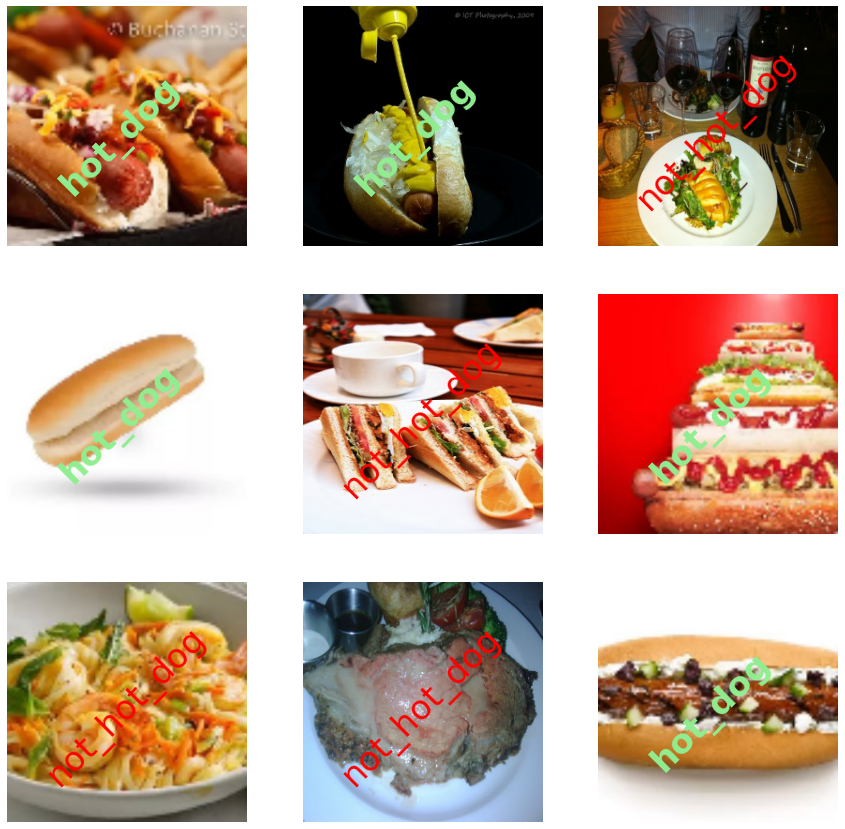

In [36]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = resnet50.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")

## VGG19

In [39]:
vgg19 = models.create_VGG19(image_height, image_width, channels)
vgg19.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [40]:
vgg19.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy',
                       tf.keras.metrics.AUC(), 
                       tf.keras.metrics.Recall(),
                      ]
            )

### Train Model

In [41]:
run_logdir = utils.get_run_logdir('vgg19')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [42]:
vgg19.fit(train_ds,
          validation_data=validation_ds,
          epochs=25,
          callbacks=[
                     early_exit_cb, 
                     tensorboard_cb
                    ]
        )

Epoch 1/25
124/206 [=================>............] - ETA: 8:34 - loss: 7.5382 - accuracy: 0.6951 - auc_4: 0.7071 - recall_4: 0.7370

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1612s 8s/step - loss: 4.9394 - accuracy: 0.7173 - auc_4: 0.7339 - recall_4: 0.7638 - val_loss: 0.4883 - val_accuracy: 0.7916 - val_auc_4: 0.8636 - val_recall_4: 0.9025
Epoch 2/25
124/206 [=================>............] - ETA: 8:33 - loss: 0.5605 - accuracy: 0.7689 - auc_4: 0.8376 - recall_4: 0.8025

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1617s 8s/step - loss: 0.5390 - accuracy: 0.7735 - auc_4: 0.8432 - recall_4: 0.8112 - val_loss: 0.4148 - val_accuracy: 0.8068 - val_auc_4: 0.8915 - val_recall_4: 0.8658
Epoch 3/25
124/206 [=================>............] - ETA: 8:31 - loss: 0.4576 - accuracy: 0.7946 - auc_4: 0.8729 - recall_4: 0.8299

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1630s 8s/step - loss: 0.4513 - accuracy: 0.7997 - auc_4: 0.8748 - recall_4: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.8117 - val_auc_4: 0.8999 - val_recall_4: 0.9371
Epoch 4/25
124/206 [=================>............] - ETA: 8:32 - loss: 0.4302 - accuracy: 0.8122 - auc_4: 0.8851 - recall_4: 0.8496

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1602s 8s/step - loss: 0.4236 - accuracy: 0.8129 - auc_4: 0.8877 - recall_4: 0.8516 - val_loss: 0.3957 - val_accuracy: 0.8238 - val_auc_4: 0.9113 - val_recall_4: 0.9403
Epoch 5/25
124/206 [=================>............] - ETA: 8:32 - loss: 0.3864 - accuracy: 0.8246 - auc_4: 0.9050 - recall_4: 0.8600

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1604s 8s/step - loss: 0.3854 - accuracy: 0.8243 - auc_4: 0.9053 - recall_4: 0.8616 - val_loss: 0.3645 - val_accuracy: 0.8360 - val_auc_4: 0.9157 - val_recall_4: 0.9004
Epoch 6/25
124/206 [=================>............] - ETA: 8:27 - loss: 0.3646 - accuracy: 0.8400 - auc_4: 0.9167 - recall_4: 0.8744

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1596s 8s/step - loss: 0.3587 - accuracy: 0.8435 - auc_4: 0.9191 - recall_4: 0.8782 - val_loss: 0.3848 - val_accuracy: 0.8293 - val_auc_4: 0.9152 - val_recall_4: 0.9329
Epoch 7/25
124/206 [=================>............] - ETA: 8:28 - loss: 0.3684 - accuracy: 0.8445 - auc_4: 0.9169 - recall_4: 0.8772

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1591s 8s/step - loss: 0.3539 - accuracy: 0.8514 - auc_4: 0.9225 - recall_4: 0.8845 - val_loss: 0.3446 - val_accuracy: 0.8366 - val_auc_4: 0.9233 - val_recall_4: 0.8983
Epoch 8/25
124/206 [=================>............] - ETA: 8:29 - loss: 0.3416 - accuracy: 0.8548 - auc_4: 0.9283 - recall_4: 0.8816

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1611s 8s/step - loss: 0.3414 - accuracy: 0.8541 - auc_4: 0.9277 - recall_4: 0.8827 - val_loss: 0.3680 - val_accuracy: 0.8408 - val_auc_4: 0.9141 - val_recall_4: 0.8899
Epoch 9/25
124/206 [=================>............] - ETA: 8:38 - loss: 0.3469 - accuracy: 0.8526 - auc_4: 0.9253 - recall_4: 0.8744

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 1618s 8s/step - loss: 0.3432 - accuracy: 0.8542 - auc_4: 0.9262 - recall_4: 0.8816 - val_loss: 0.3654 - val_accuracy: 0.8238 - val_auc_4: 0.9146 - val_recall_4: 0.8459


### Evaluation

In [43]:
vgg19.evaluate(test_ds)

55/55 [==============================] - 335s 6s/step - loss: 0.3657 - accuracy: 0.8434 - auc_4: 0.9203 - recall_4: 0.8793


[0.36570075154304504,
 0.8433526158332825,
 0.9202595949172974,
 0.8792535662651062]

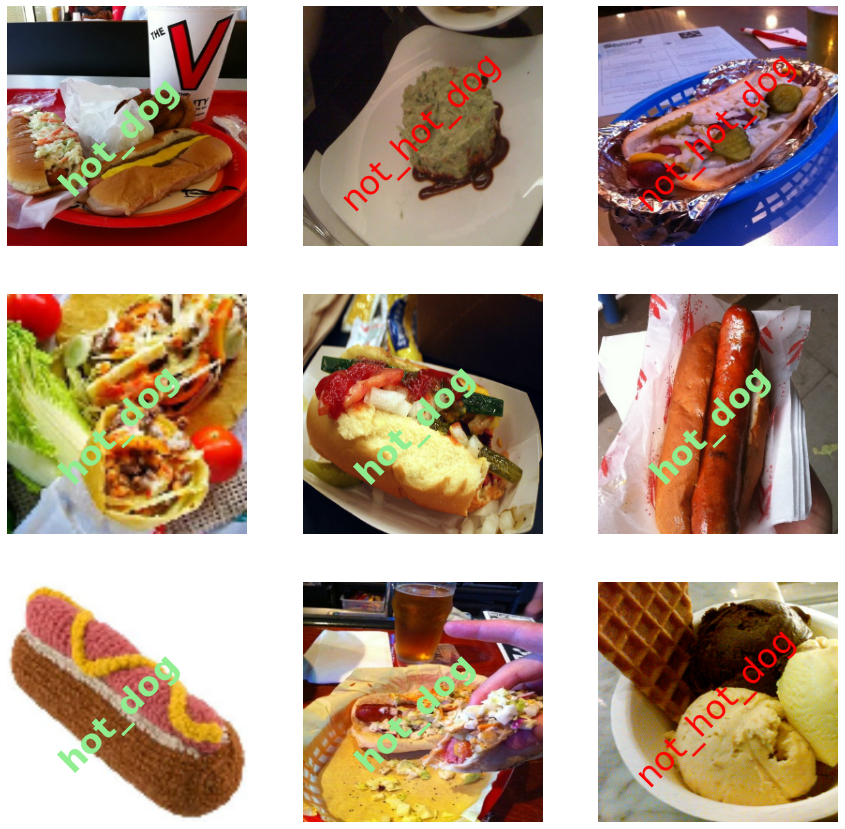

In [44]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = vgg19.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")

## Inception V3

### Initializing Model

In [45]:
inceptionv3 = models.create_InceptionV3(image_height, image_width, channels)
inceptionv3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_411 (Conv2D)            (None, 127, 127, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_408 (Batch  (None, 127, 127, 32  96         ['conv2d_411[0][0]']             
 Normalization)                 )                                                           

In [51]:
inceptionv3.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                    metrics=['accuracy',
                             tf.keras.metrics.AUC(), 
                             tf.keras.metrics.Recall(),
                            ]
                  )

### Training

In [52]:
run_logdir = utils.get_run_logdir('inceptionv3')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_exit_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [53]:
inceptionv3.fit(train_ds,
                validation_data=validation_ds,
                epochs=25,
                callbacks=[
                           early_exit_cb, 
                           tensorboard_cb
                          ]
                )

Epoch 1/25
123/206 [================>.............] - ETA: 1:51 - loss: 0.7600 - accuracy: 0.5671 - auc_6: 0.5099 - recall_6: 0.9781

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 343s 2s/step - loss: 0.7505 - accuracy: 0.5724 - auc_6: 0.5067 - recall_6: 0.9789 - val_loss: 2.4035 - val_accuracy: 0.5796 - val_auc_6: 0.4324 - val_recall_6: 1.0000
Epoch 2/25
123/206 [================>.............] - ETA: 1:44 - loss: 0.7309 - accuracy: 0.5666 - auc_6: 0.4959 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 325s 2s/step - loss: 0.7655 - accuracy: 0.5753 - auc_6: 0.5007 - recall_6: 0.9971 - val_loss: 0.6802 - val_accuracy: 0.5796 - val_auc_6: 0.5016 - val_recall_6: 1.0000
Epoch 3/25
123/206 [================>.............] - ETA: 1:44 - loss: 0.6948 - accuracy: 0.5689 - auc_6: 0.4938 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 325s 2s/step - loss: 0.7084 - accuracy: 0.5759 - auc_6: 0.4952 - recall_6: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.5796 - val_auc_6: 0.5016 - val_recall_6: 1.0000
Epoch 4/25
123/206 [================>.............] - ETA: 1:43 - loss: 0.6841 - accuracy: 0.5676 - auc_6: 0.4954 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 322s 2s/step - loss: 0.6817 - accuracy: 0.5759 - auc_6: 0.4984 - recall_6: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.5796 - val_auc_6: 0.5023 - val_recall_6: 1.0000
Epoch 5/25
123/206 [================>.............] - ETA: 1:43 - loss: 0.6843 - accuracy: 0.5671 - auc_6: 0.4877 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 322s 2s/step - loss: 0.6817 - accuracy: 0.5759 - auc_6: 0.4922 - recall_6: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.5796 - val_auc_6: 0.5023 - val_recall_6: 1.0000
Epoch 6/25
123/206 [================>.............] - ETA: 1:45 - loss: 0.6838 - accuracy: 0.5689 - auc_6: 0.4888 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 331s 2s/step - loss: 0.6817 - accuracy: 0.5759 - auc_6: 0.4949 - recall_6: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.5796 - val_auc_6: 0.5023 - val_recall_6: 1.0000
Epoch 7/25
123/206 [================>.............] - ETA: 1:44 - loss: 0.6838 - accuracy: 0.5689 - auc_6: 0.4964 - recall_6: 1.0000

Corrupt JPEG data: premature end of data segment


206/206 [==============================] - 326s 2s/step - loss: 0.6817 - accuracy: 0.5759 - auc_6: 0.4961 - recall_6: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.5796 - val_auc_6: 0.5023 - val_recall_6: 1.0000


### Evaluation

In [54]:
inceptionv3.evaluate(test_ds)

55/55 [==============================] - 60s 1s/step - loss: 0.6977 - accuracy: 0.5266 - auc_6: 0.5000 - recall_6: 1.0000


[0.6976941227912903, 0.526589572429657, 0.49999865889549255, 1.0]

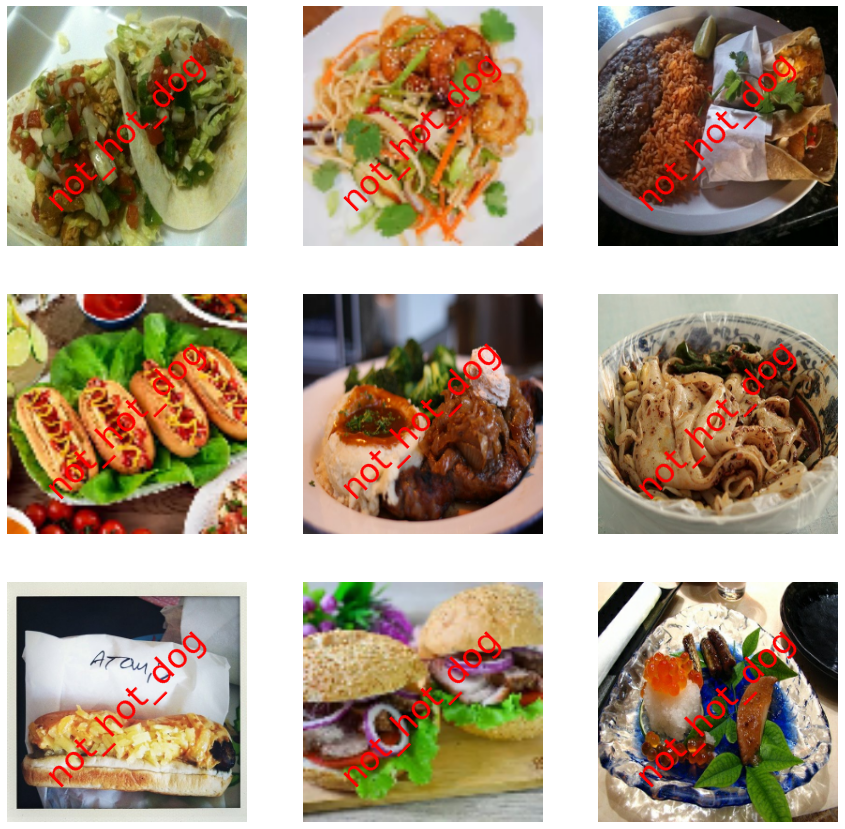

In [55]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = inceptionv3.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions <= 0.5, 0, 1)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    label = class_names[predictions[i]]
    #print(label)
    if label=='hot_dog':
        plt.text(50, 200, label, rotation=45, color='lightgreen', fontsize=34, fontweight='bold')
    else:
        plt.text(35, 215, label, rotation=45, color='red', fontsize=34, fontweight='normal')
    plt.axis("off")